<a href="https://colab.research.google.com/github/2303A51170/T.RAMANA/blob/main/Lab-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000          

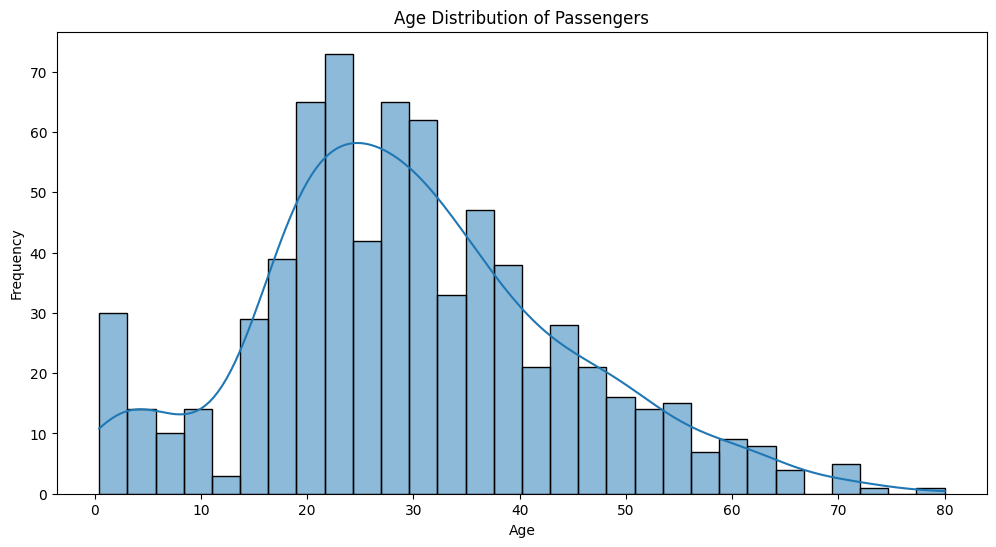

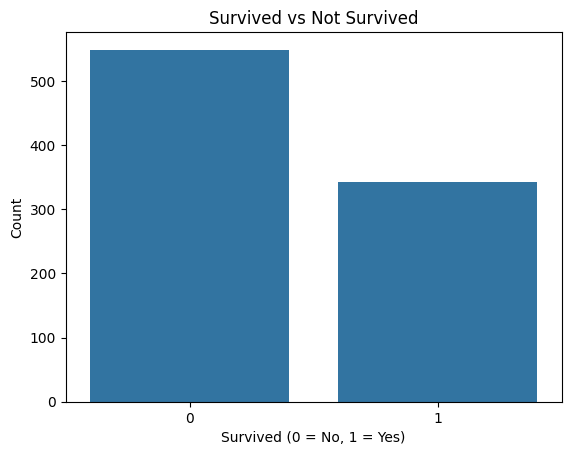

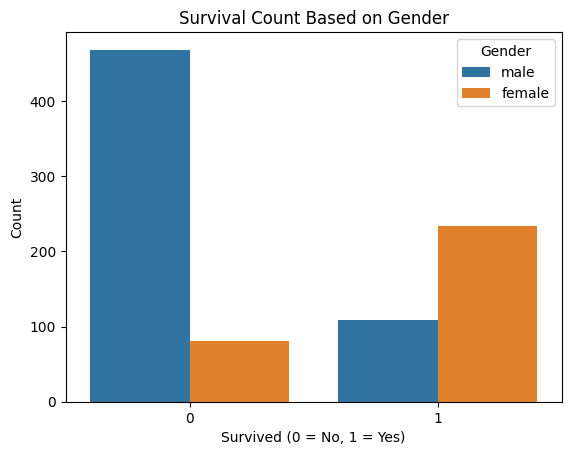

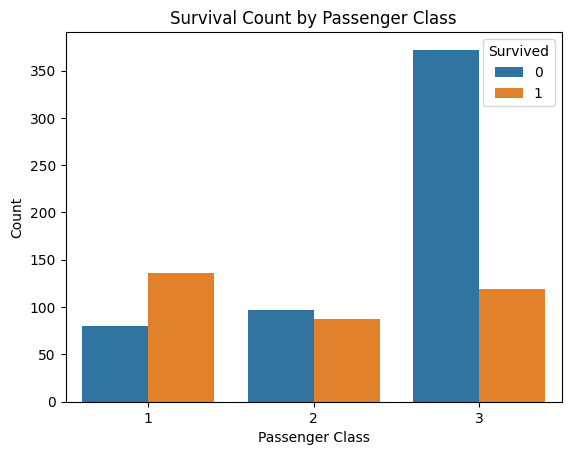

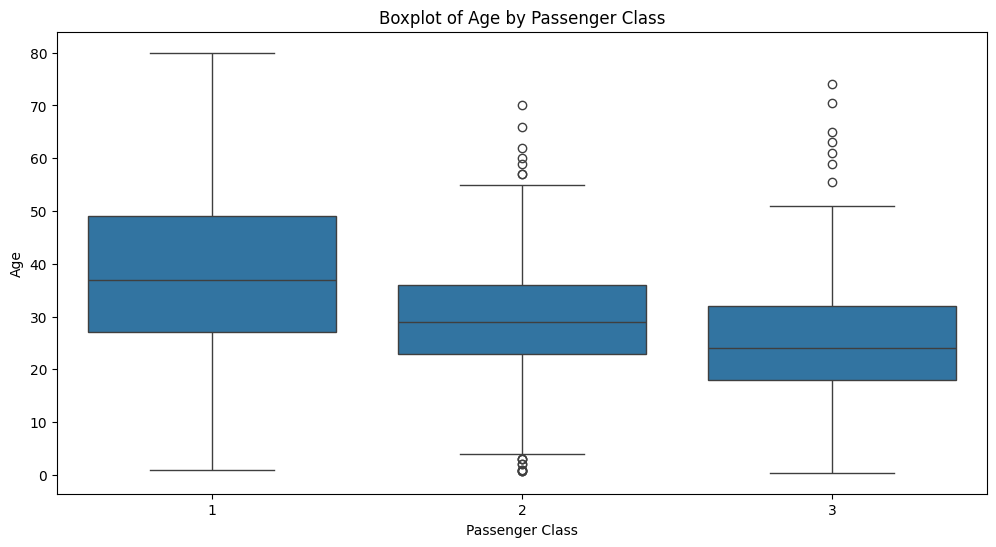


Cleaned DataFrame:
   PassengerId Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1        0       3    0  22.0      1      0   7.2500       2.0
1            2        1       1    1  38.0      1      0  71.2833       0.0
2            3        1       3    1  26.0      0      0   7.9250       2.0
3            4        1       1    1  35.0      1      0  53.1000       2.0
4            5        0       3    0  35.0      0      0   8.0500       2.0


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('titanic_train.csv')

print("Data Types:")
print(df.dtypes)

summary = df.describe(include='all')
print("\nSummary Statistics:")
print(summary)
print("\nColumn Names:")
print(df.columns.tolist())
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
sns.countplot(data=df, x='Survived')
plt.title('Survived vs Not Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count Based on Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Boxplot of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()
df['Age'].fillna(df['Age'].median(), inplace=True)

df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Survived'] = df['Survived'].astype('category')
print("\nCleaned DataFrame:")
print(df.head())


part-2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


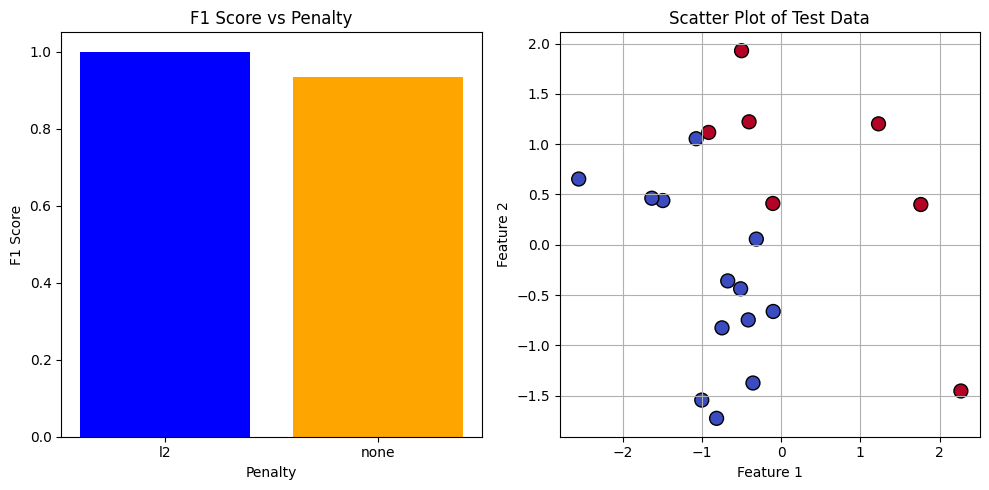

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
np.random.seed(0)
X = np.random.randn(100, 2)
Y = (X[:, 0] + X[:, 1] > 0).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

penalties = ['l2', 'none']
f1_scores = []
for penalty in penalties:
    model = LogisticRegression(penalty=penalty, solver='lbfgs', max_iter=1000)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    f1 = f1_score(Y_test, Y_pred)
    f1_scores.append(f1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(penalties, f1_scores, color=['blue', 'orange'])
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Penalty')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Test Data')
plt.grid(True)

plt.tight_layout()
plt.show()
